<a href="https://colab.research.google.com/github/davrodrod/algoritmosIA/blob/master/DL_Tensorflow_clasificarNumeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Valor real: 8
Valor predicho: 8


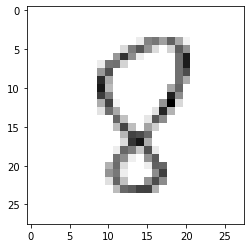

In [24]:
# Fuente: https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/

import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays
import numpy as np
import matplotlib.pyplot as plt


mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

def entrenaModelo(x_train, y_train):
  model = tf.keras.models.Sequential()  # a basic feed-forward model
  model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
  model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
  model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
  model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

  model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

  model.fit(x_train, y_train, epochs=3)  # train the model
  # Salvar el modelo
  model.save('epic_num_reader.model')
  return model

def validaModelo(model, x_test, y_test):
  val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
  print(val_loss)  # model's loss (error)
  print(val_acc)  # model's accuracy


#Aquí puede llamarse a entrenaModelo o a recuperar el modelo si ya existe

#model= entrenaModelo(x_train,y_train)
#validaModelo(model,x_train,y_train)

# Recuperar el modelo
new_model = tf.keras.models.load_model('epic_num_reader.model')

# Predicción
print("Valor real: " + str(y_test[1942]))
muestra = x_test[1942,:,:]
muestra = muestra[np.newaxis,:, :]
predict = model.predict(muestra)
print("Valor predicho: " + str(np.argmax(predict)))

plt.imshow(x_test[1942],cmap=plt.cm.binary)
plt.show()